# **Predicting the Efficiency Status of Device using Decision Tree Algorithm**

**Description:**

This dataset captures smart home device usage metrics, offering insights into user behaviour, device efficiency, and preferences. It includes data on device types, usage patterns, energy consumption, malfunction incidents, and user satisfaction metrics.



**Features:**

·       UniqueUserID:    Unique identifier for each user.

·       DeviceCategory:   Type of smart home device (e.g., Lights, Thermostat).

·       DailyUsageHours:    Average hours per day the device is used.

·       DailyEnergyUse_kWh: Daily energy consumption of the device (kWh).

·       UserPreference:    User preference for device usage (0 - Low, 1 - High).

·       ReportedIssuesCount: Number of malfunction incidents reported.

·       DeviceLifespanMonths: Age of the device in months.

·       DeviceEfficiencyStatus (Target Variable):  Efficiency status of the
        smart home device (0 - Inefficient, 1 - Efficient).

In [ ]:
#importing libraries
import pandas as pd                                          #for data manipulation and analysis
import numpy as np                                           #for numerical computing
import seaborn as sns                                        #based on matplotlib for statistical visulaisation
import matplotlib.pyplot as plt                              #animated and interactive visualisation and pyplot is one of the libraries
from sklearn.model_selection import train_test_split         # function on sklearn and splits data for ml model
from sklearn.tree import DecisionTreeClassifier              #to implement dt for classification task
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.tree import plot_tree                           #to visulaise the DT
from sklearn.tree import export_graphviz                     #export the DT model into Graphviz format to create visualisation into a dot file
import graphviz                                              #open source visualisation tool
from sklearn.model_selection import GridSearchCV             #For hyperparameter tuning
import pydotplus                                             #converts dot to image
from IPython.display import Image                            #displays the image generated by graphviz
import joblib



In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving Data.xlsx to Data.xlsx


In [ ]:
#the file is converted into csv format
df=pd.read_excel('/content/Data.xlsx')
df.to_csv('/content/Data.xlsx')

In [ ]:
df.head().transpose()

0          1                2         3  \
UniqueUserID                        1          2                3         4   
DeviceCategory          Smart Speaker     Camera  Security System    Camera   
DailyUsageHours             15.307188  19.973343        18.911535  7.011127   
DailyEnergyUse_kWh           1.961607   8.610689         2.651777  2.341653   
UserPreferences                     1          1                1         0   
ReportedIssuesCount                 4          0                0         3   
DeviceLifespanMonths               36         29               20        15   
DeviceEfficiencyStatus              1          1                1         0   

                                4  
UniqueUserID                    5  
DeviceCategory             Camera  
DailyUsageHours         22.610684  
DailyEnergyUse_kWh       4.859069  
UserPreferences                 1  
ReportedIssuesCount             3  
DeviceLifespanMonths           36  
DeviceEfficiencyStatus          1

In [ ]:
df.tail().transpose()

4894        4895        4896       4897  \
UniqueUserID                  4895        4896        4897       4898   
DeviceCategory          Thermostat  Thermostat  Thermostat     Lights   
DailyUsageHours          10.909022   14.583399    11.69395  22.421886   
DailyEnergyUse_kWh        7.702582    8.543951    7.811037   6.347551   
UserPreferences                  0           1           0          1   
ReportedIssuesCount              2           4           2          3   
DeviceLifespanMonths            31          31          30         36   
DeviceEfficiencyStatus           0           1           0          0   

                            4898  
UniqueUserID                4899  
DeviceCategory            Camera  
DailyUsageHours         2.287991  
DailyEnergyUse_kWh      5.188268  
UserPreferences                0  
ReportedIssuesCount            0  
DeviceLifespanMonths           1  
DeviceEfficiencyStatus         0

In [ ]:
df.shape

(4899, 8)

The dataset has 4899 Rows and 8 Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UniqueUserID            4899 non-null   int64  
 1   DeviceCategory          4899 non-null   object 
 2   DailyUsageHours         4899 non-null   float64
 3   DailyEnergyUse_kWh      4899 non-null   float64
 4   UserPreferences         4899 non-null   int64  
 5   ReportedIssuesCount     4899 non-null   int64  
 6   DeviceLifespanMonths    4899 non-null   int64  
 7   DeviceEfficiencyStatus  4899 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 306.3+ KB


In [ ]:
df.dtypes

UniqueUserID                int64
DeviceCategory             object
DailyUsageHours           float64
DailyEnergyUse_kWh        float64
UserPreferences             int64
ReportedIssuesCount         int64
DeviceLifespanMonths        int64
DeviceEfficiencyStatus      int64
dtype: object

The dataset contains 7 numerical and 1 categorical variable

Numerical =['UniqueUserID','DailyUsageHours','DailyEnergyUse_kWh','UserPreferences',ReportedIssuesCount','DeviceLifespanMonths','DeviceEfficiencyStatus']

Categorical=['DeviceCategory']

Boolean Values = UserPreferences , DeviceEfficiencyStatus

In [ ]:
df.describe()

UniqueUserID  DailyUsageHours  DailyEnergyUse_kWh  UserPreferences  \
count   4899.000000      4899.000000         4899.000000      4899.000000   
mean    2450.000000        12.065016            5.058016         0.511533   
std     1414.363815         6.734952            2.891653         0.499918   
min        1.000000         0.501241            0.101562         0.000000   
25%     1225.500000         6.273737            2.522905         0.000000   
50%     2450.000000        11.904097            4.999625         1.000000   
75%     3674.500000        17.835471            7.632410         1.000000   
max     4899.000000        23.987326            9.996765         1.000000   

       ReportedIssuesCount  DeviceLifespanMonths  DeviceEfficiencyStatus  
count          4899.000000           4899.000000             4899.000000  
mean              2.071443             30.262707                0.366197  
std               1.420336             16.993927                0.481813  
min               0.000000              1.000000                0.000000  
25%               1.000000             15.000000                0.000000  
50%               2.000000             30.000000                0.000000  
75%               3.000000             45.000000                1.000000  
max               4.000000             59.000000                1.000000

The average UsageHours = 12
The range of UsageHours = 0.5 -24

The AverageUnits used = 5
The range of Units used=0-9.9

The Average count of Issues reported =2
The Range of issues reported =0-4

In [ ]:
df.isna()

UniqueUserID  DeviceCategory  DailyUsageHours  DailyEnergyUse_kWh  \
0            False           False            False               False   
1            False           False            False               False   
2            False           False            False               False   
3            False           False            False               False   
4            False           False            False               False   
...            ...             ...              ...                 ...   
4894         False           False            False               False   
4895         False           False            False               False   
4896         False           False            False               False   
4897         False           False            False               False   
4898         False           False            False               False   

      UserPreferences  ReportedIssuesCount  DeviceLifespanMonths  \
0               False                False                 False   
1               False                False                 False   
2               False                False                 False   
3               False                False                 False   
4               False                False                 False   
...               ...                  ...                   ...   
4894            False                False                 False   
4895            False                False                 False   
4896            False                False                 False   
4897            False                False                 False   
4898            False                False                 False   

      DeviceEfficiencyStatus  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False  
...                      ...  
4894                   False  
4895                   False  
4896                   False  
4897                   False  
4898                   False  

[4899 rows x 8 columns]

In [ ]:
df.isna().sum()

UniqueUserID              0
DeviceCategory            0
DailyUsageHours           0
DailyEnergyUse_kWh        0
UserPreferences           0
ReportedIssuesCount       0
DeviceLifespanMonths      0
DeviceEfficiencyStatus    0
dtype: int64

No Null values detected

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4894    False
4895    False
4896    False
4897    False
4898    False
Length: 4899, dtype: bool

In [ ]:
df.duplicated().sum()

0

No duplicate Values found

In [ ]:
df.head()

UniqueUserID   DeviceCategory  DailyUsageHours  DailyEnergyUse_kWh  \
0             1    Smart Speaker        15.307188            1.961607   
1             2           Camera        19.973343            8.610689   
2             3  Security System        18.911535            2.651777   
3             4           Camera         7.011127            2.341653   
4             5           Camera        22.610684            4.859069   

   UserPreferences  ReportedIssuesCount  DeviceLifespanMonths  \
0                1                    4                    36   
1                1                    0                    29   
2                1                    0                    20   
3                0                    3                    15   
4                1                    3                    36   

   DeviceEfficiencyStatus  
0                       1  
1                       1  
2                       1  
3                       0  
4                       1

# **Basic Visualisation**



1.   To analyze the trends and patterns of data
2.   To analyze the frequency of data
3.   To know th edistribution of values
4.   To identify the relationship between variables





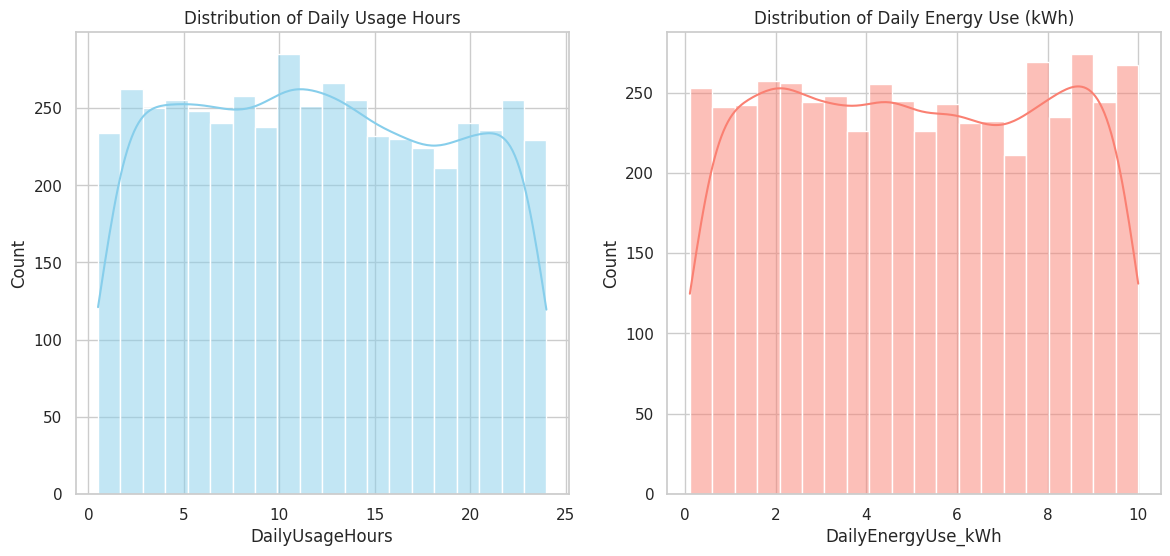

In [ ]:
                                                        # Sets the  style of the plots
sns.set(style="whitegrid")

                                                        # Distribution of Daily Usage Hours and Daily Energy Use
plt.figure(figsize=(14, 6))                             #specifyinmg the container size to hold all the graphs 14 inch wide  and 6 inch tall

plt.subplot(1, 2, 1)                                    #the subplots will have 1 row and two columns and this is the first column
sns.histplot(df['DailyUsageHours'], kde=True, bins=20, color='skyblue')   #bins are the number of bars in the histogram                 #creates the curve KDE
plt.title('Distribution of Daily Usage Hours')

plt.subplot(1, 2, 2)
sns.histplot(df['DailyEnergyUse_kWh'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Daily Energy Use (kWh)')

plt.show()

There are some devices that have extremely high usage and
 a few outliers consuming significantly more energy.


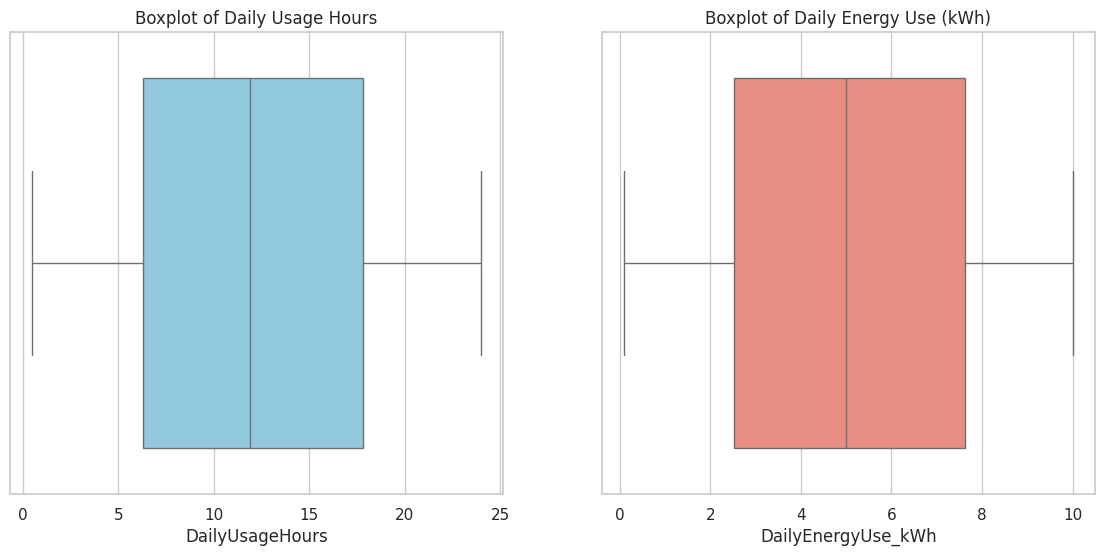

In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['DailyUsageHours'], color='skyblue')
plt.title('Boxplot of Daily Usage Hours')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['DailyEnergyUse_kWh'], color='salmon')
plt.title('Boxplot of Daily Energy Use (kWh)')

plt.show()


<ipython-input-17-b79dae9bbb44>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DeviceCategory', data=df, palette='coolwarm')
<ipython-input-17-b79dae9bbb44>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='UserPreferences', data=df, palette='coolwarm')


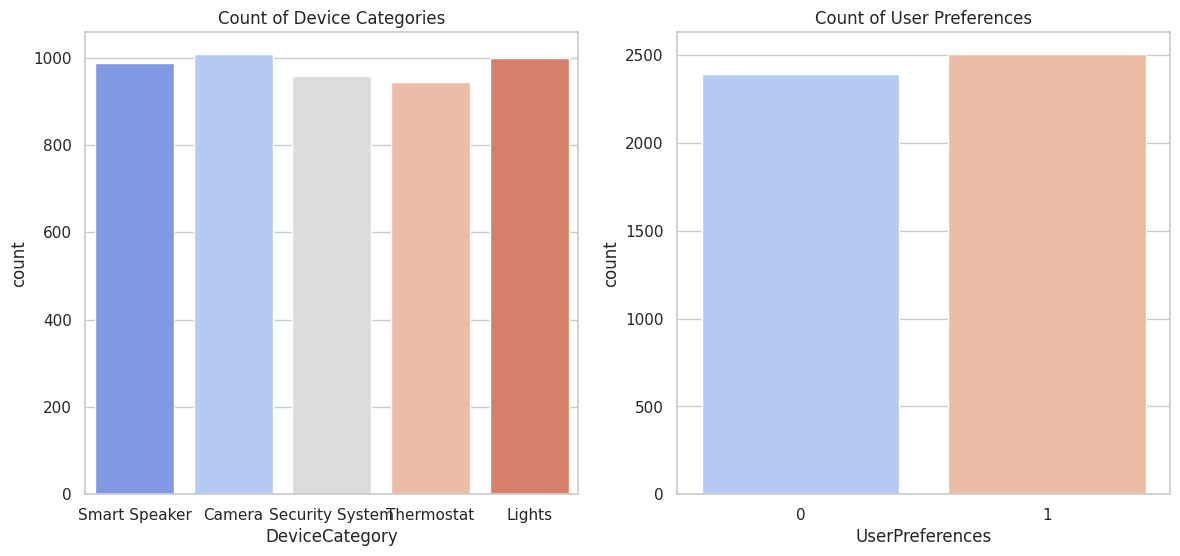

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='DeviceCategory', data=df, palette='coolwarm')
plt.title('Count of Device Categories')

plt.subplot(1, 2, 2)
sns.countplot(x='UserPreferences', data=df, palette='coolwarm')
plt.title('Count of User Preferences')

plt.show()

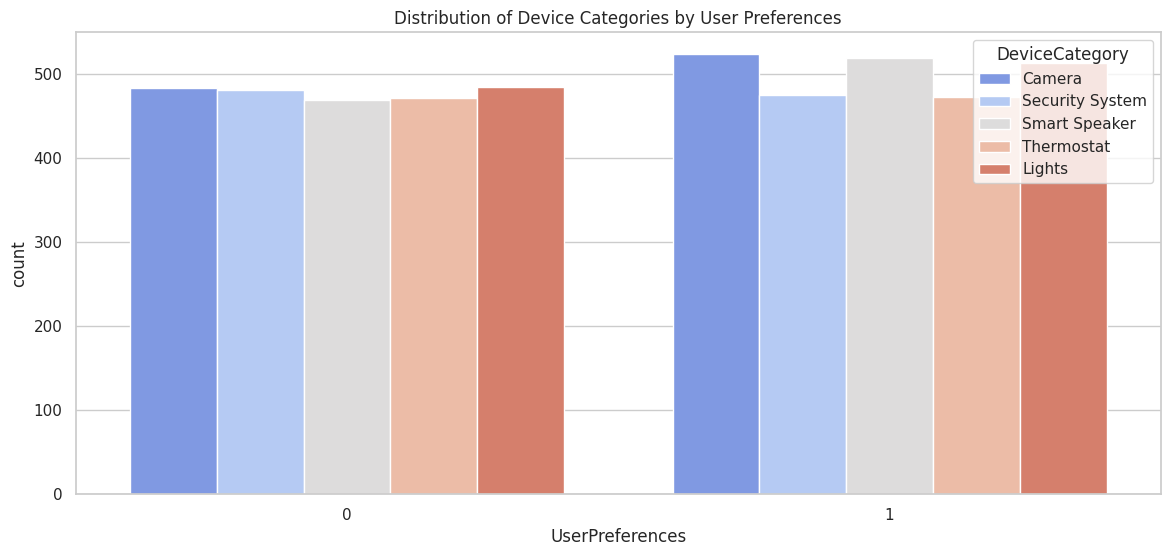

In [ ]:
plt.figure(figsize=(14, 6))

sns.countplot(x='UserPreferences', hue='DeviceCategory', data=df, palette='coolwarm')
plt.title('Distribution of Device Categories by User Preferences')

plt.show()


User Preference:

camera>lights>smart speaker>security System>Thermostat

<ipython-input-19-4bd13e1958a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DailyUsageHours', y='DeviceCategory', data=df, palette='coolwarm')


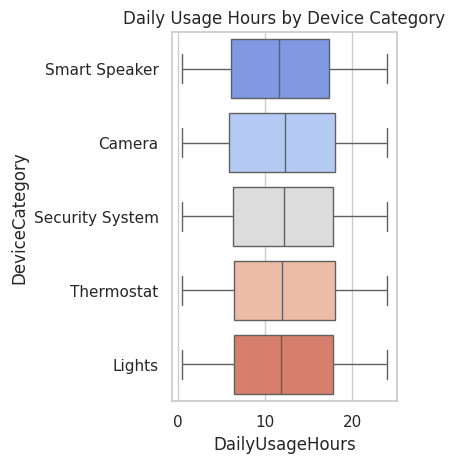

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(x='DailyUsageHours', y='DeviceCategory', data=df, palette='coolwarm')
plt.title('Daily Usage Hours by Device Category')

plt.show()

<ipython-input-20-998fecbd84ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DeviceEfficiencyStatus', y='DeviceLifespanMonths', data=df, palette='viridis')


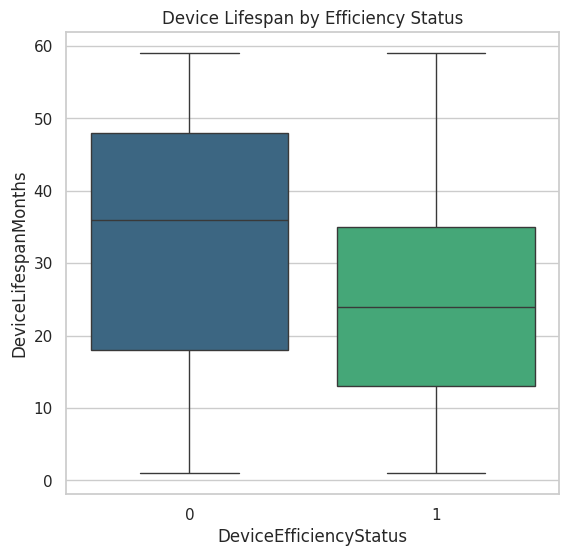

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
sns.boxplot(x='DeviceEfficiencyStatus', y='DeviceLifespanMonths', data=df, palette='viridis')
plt.title('Device Lifespan by Efficiency Status')

plt.show()

The higher lifespan of inefficient devices suggests that these devices are built to last despite their inefficiency. This might indicate that the design or materials used in these devices contribute to their durability, even though they may not be energy-efficient.


<ipython-input-21-2f3293827174>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DeviceLifespanMonths', y='DeviceCategory', data=df, palette='viridis')


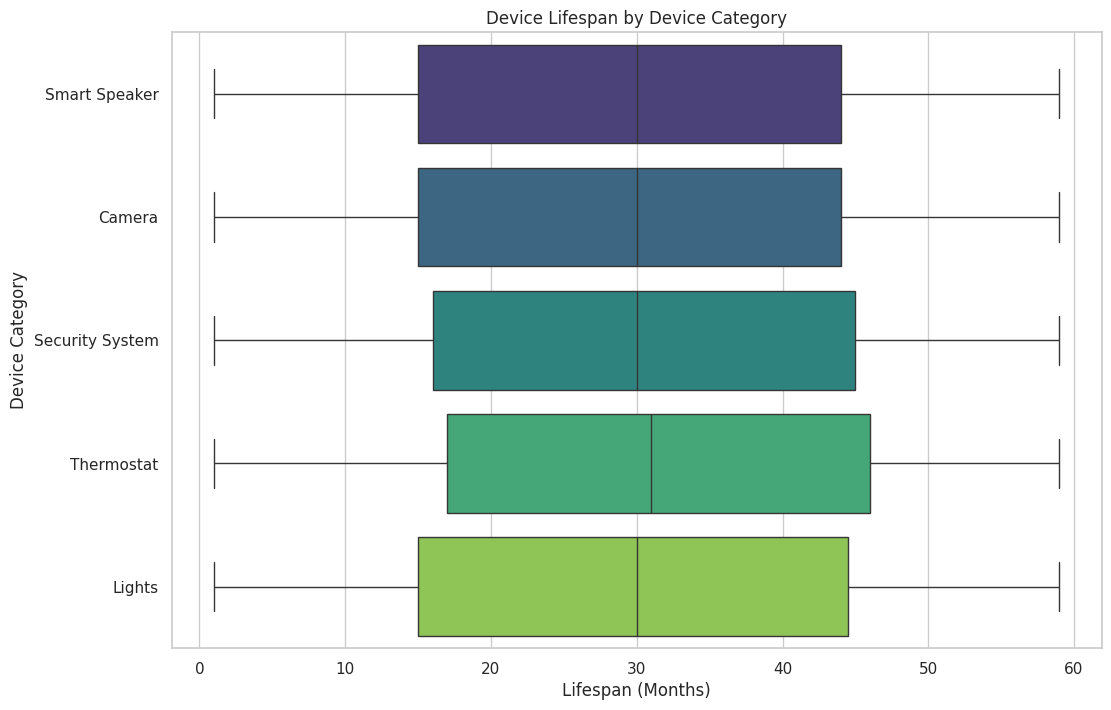

In [ ]:
sns.set(style="whitegrid")

# Boxplot to visualize the lifespan of devices across different categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='DeviceLifespanMonths', y='DeviceCategory', data=df, palette='viridis')
plt.title('Device Lifespan by Device Category')
plt.xlabel('Lifespan (Months)')
plt.ylabel('Device Category')
plt.show()

Categories with a higher median lifespan are those where devices tend to last longer.

Thermostat has higher lifespan but it is also a less prefered device

Thermostat Lifespan vs. Preference:

The thermostat has a higher lifespan but is less preferred compared to other devices. This could indicate that while thermostats are built to last longer, they might not be as popular due to factors such as functionality, user experience, or market trends. It may be useful to explore why user preference is lower and whether improvements in design or features could enhance its appeal.

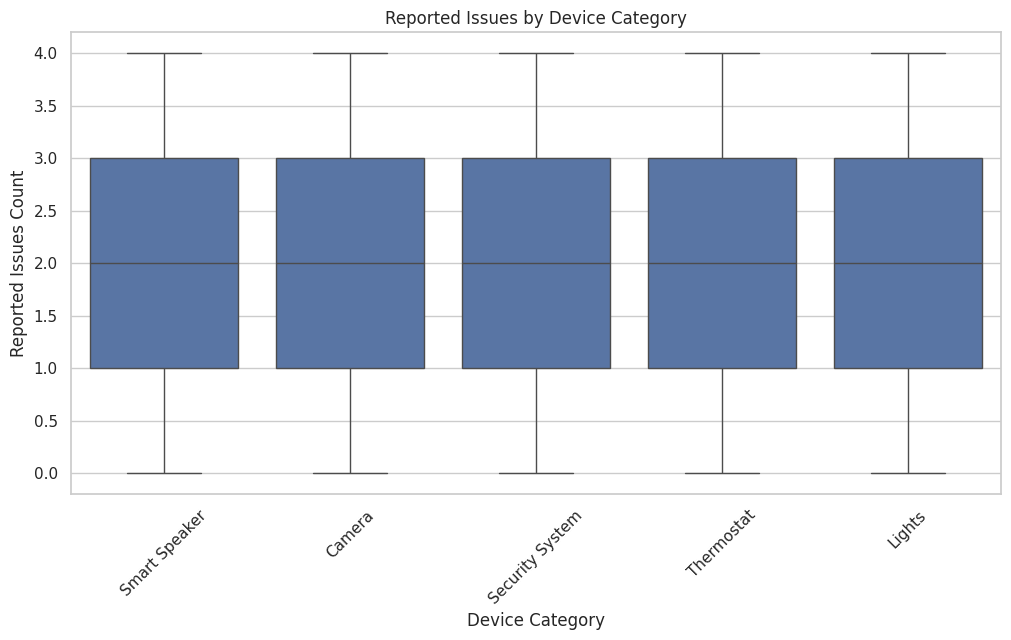

In [ ]:
# Box plot of Reported Issues by Device Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='DeviceCategory', y='ReportedIssuesCount', data=df)
plt.title('Reported Issues by Device Category')
plt.xlabel('Device Category')
plt.ylabel('Reported Issues Count')
plt.xticks(rotation=45)  #xticks() controls the properties of the x-axis such as positions,labels etc.the rotation mentions the angle at which the label should be displayed
plt.show()


<ipython-input-23-b771a1b62bdb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='UserPreferences', y='ReportedIssuesCount', data=df, ci=None)


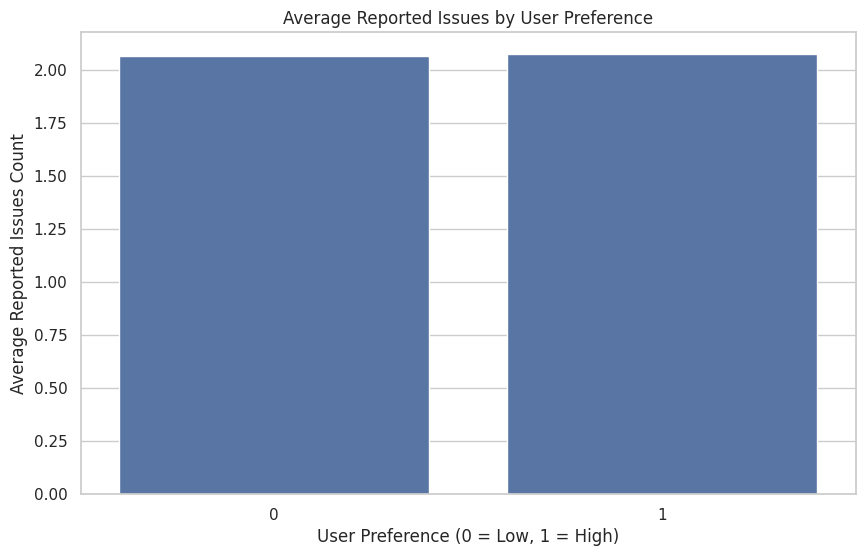

In [ ]:
# Bar plot of average Reported Issues by User Preference
plt.figure(figsize=(10, 6))
sns.barplot(x='UserPreferences', y='ReportedIssuesCount', data=df, ci=None)
plt.title('Average Reported Issues by User Preference')
plt.xlabel('User Preference (0 = Low, 1 = High)')
plt.ylabel('Average Reported Issues Count')
plt.show()


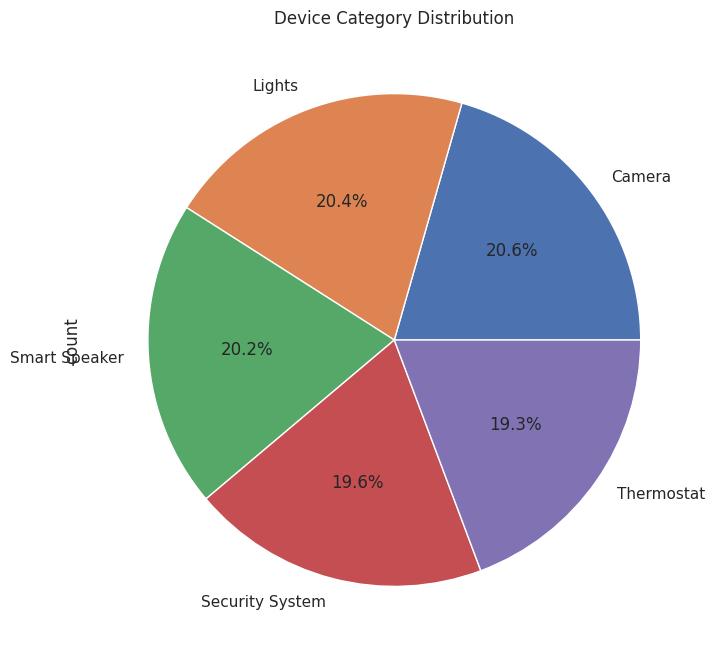

In [ ]:
# Pie chart for a categorical variable
plt.figure(figsize=(8, 8))
df['DeviceCategory'].value_counts().plot.pie(autopct='%1.1f%%')#value counts () counts the occurences of the unique values in the device category
plt.title('Device Category Distribution')                      #autopct parameter controls the percentage values with one decical place 1.1 means one before and after decimal
plt.show()


In [ ]:
df['DeviceCategory'].unique()

array(['Smart Speaker', 'Camera', 'Security System', 'Thermostat',
       'Lights'], dtype=object)

There exist 5 Device categories

ML Algorithms cannot handle categorical data hence need to convert to dummy variable

Dummy variable will not allocate any order for the categories and therefore ml models will not be considering any one of the categories as greater than the other


Using .get_dummies()


# Dummy Variable

In [ ]:
#dummy variable creation
'''drop_first  will remove the first column and hence reduce the number of features and aslo reduces
the multicolienearity or deceases the dependency of these columns upon each other'''

data_with_dummy_variable=pd.get_dummies(df,columns=['DeviceCategory'],drop_first=True)

In [ ]:
data_with_dummy_variable.head()

UniqueUserID  DailyUsageHours  DailyEnergyUse_kWh  UserPreferences  \
0             1        15.307188            1.961607                1   
1             2        19.973343            8.610689                1   
2             3        18.911535            2.651777                1   
3             4         7.011127            2.341653                0   
4             5        22.610684            4.859069                1   

   ReportedIssuesCount  DeviceLifespanMonths  DeviceEfficiencyStatus  \
0                    4                    36                       1   
1                    0                    29                       1   
2                    0                    20                       1   
3                    3                    15                       0   
4                    3                    36                       1   

   DeviceCategory_Lights  DeviceCategory_Security System  \
0                  False                           False   
1                  False                           False   
2                  False                            True   
3                  False                           False   
4                  False                           False   

   DeviceCategory_Smart Speaker  DeviceCategory_Thermostat  
0                          True                      False  
1                         False                      False  
2                         False                      False  
3                         False                      False  
4                         False                      False

In [ ]:
correlation_matrix=data_with_dummy_variable.corr()
correlation_matrix

UniqueUserID  DailyUsageHours  \
UniqueUserID                        1.000000        -0.010398   
DailyUsageHours                    -0.010398         1.000000   
DailyEnergyUse_kWh                 -0.010930         0.025341   
UserPreferences                     0.022970         0.008182   
ReportedIssuesCount                -0.004439         0.012276   
DeviceLifespanMonths               -0.005573         0.023611   
DeviceEfficiencyStatus              0.011703         0.197939   
DeviceCategory_Lights              -0.008539         0.001154   
DeviceCategory_Security System      0.015999         0.004209   
DeviceCategory_Smart Speaker       -0.008898        -0.016349   
DeviceCategory_Thermostat          -0.004802         0.011569   

                                DailyEnergyUse_kWh  UserPreferences  \
UniqueUserID                             -0.010930         0.022970   
DailyUsageHours                           0.025341         0.008182   
DailyEnergyUse_kWh                        1.000000         0.012443   
UserPreferences                           0.012443         1.000000   
ReportedIssuesCount                       0.000311         0.002290   
DeviceLifespanMonths                     -0.015195        -0.013995   
DeviceEfficiencyStatus                   -0.208302         0.673277   
DeviceCategory_Lights                     0.000335         0.003019   
DeviceCategory_Security System            0.012320        -0.014464   
DeviceCategory_Smart Speaker             -0.029856         0.013321   
DeviceCategory_Thermostat                 0.010979        -0.010762   

                                ReportedIssuesCount  DeviceLifespanMonths  \
UniqueUserID                              -0.004439             -0.005573   
DailyUsageHours                            0.012276              0.023611   
DailyEnergyUse_kWh                         0.000311             -0.015195   
UserPreferences                            0.002290             -0.013995   
ReportedIssuesCount                        1.000000             -0.030890   
DeviceLifespanMonths                      -0.030890              1.000000   
DeviceEfficiencyStatus                    -0.134900             -0.219984   
DeviceCategory_Lights                     -0.019396             -0.012088   
DeviceCategory_Security System            -0.012481              0.004735   
DeviceCategory_Smart Speaker              -0.010619              0.000215   
DeviceCategory_Thermostat                  0.029318              0.020756   

                                DeviceEfficiencyStatus  DeviceCategory_Lights  \
UniqueUserID                                  0.011703              -0.008539   
DailyUsageHours                               0.197939               0.001154   
DailyEnergyUse_kWh                           -0.208302               0.000335   
UserPreferences                               0.673277               0.003019   
ReportedIssuesCount                          -0.134900              -0.019396   
DeviceLifespanMonths                         -0.219984              -0.012088   
DeviceEfficiencyStatus                        1.000000               0.004384   
DeviceCategory_Lights                         0.004384               1.000000   
DeviceCategory_Security System               -0.008351              -0.249534   
DeviceCategory_Smart Speaker                  0.016710              -0.254542   
DeviceCategory_Thermostat                    -0.023685              -0.247428   

                                DeviceCategory_Security System  \
UniqueUserID                                          0.015999   
DailyUsageHours                                       0.004209   
DailyEnergyUse_kWh                                    0.012320   
UserPreferences                                      -0.014464   
ReportedIssuesCount                                  -0.012481   
DeviceLifespanMonths                                  0.004735   
DeviceEfficiencyStatus                

# Correlation MAtrix

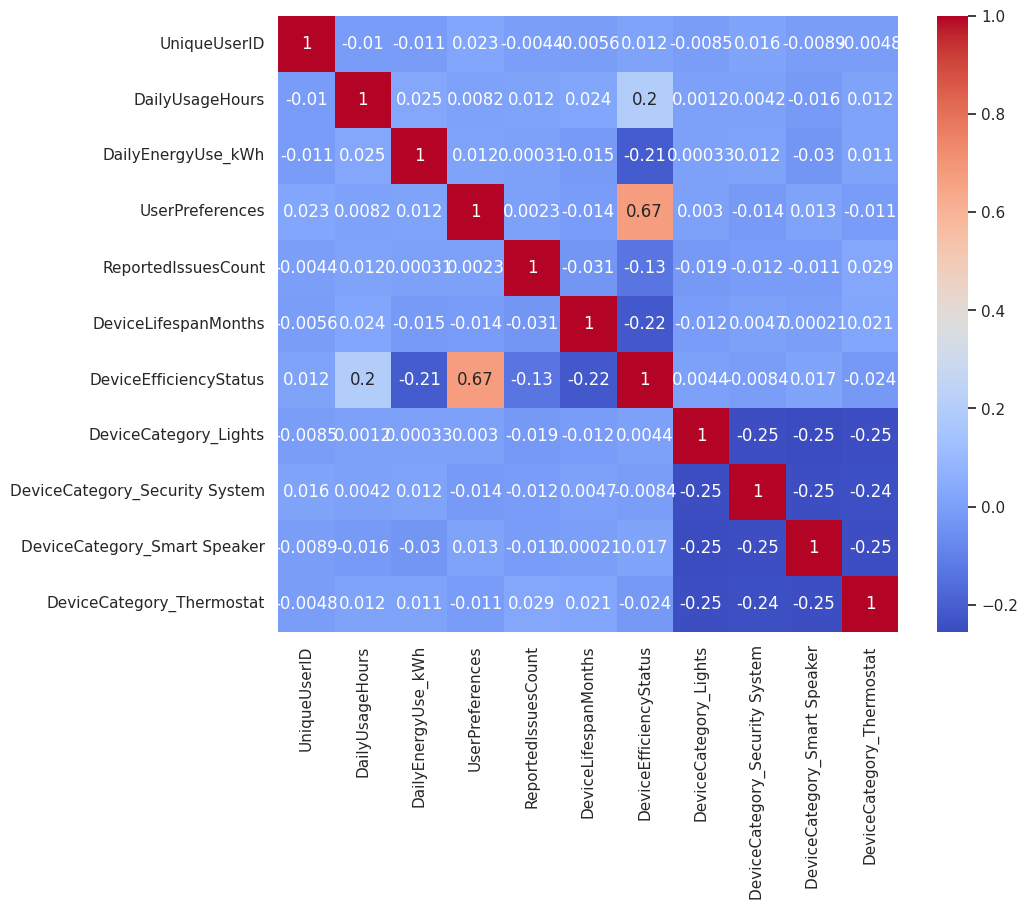

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')#annot controls whether or not to display the actual numerical values inside each cell of heatmap
plt.show()#cmap is the colormap

The dark blue regions representing the dummy variables, this indicated negative correlation among the dummy variables.The negative correlation indicates that only one of these categories can be true .

other than the dummy variables other features are having low correlation hence none of the features has to be dropped.

**DailyUsageHours: Positive correlation (0.2) - the daily usage hours are directly proportional to device efficiency status.Not very strong correlation**

DailyEnergyUse_kWh: Negative correlation (-0.21) -suggests the daily usage hours is indirectly proportional to device efficiency status

**UserPreferences: Strong positive correlation (0.67) - This is the most strongly correlated feature with the target variable.User preference and device efficiency status directly proportional**

ReportedIssuesCount: Weak negative correlation (-0.13) - Indicates that more reported issues are slightly associated with lower device efficiency.

DeviceLifespanMonths: Negative correlation (-0.22) - Suggests that as the device ages, its efficiency decreases.

Device Categories (Lights, Security System, Smart Speaker, Thermostat): Very weak correlations close to 0, implying that the specific category of the device doesn’t have much of an impact on the device efficiency status.

**Features Selected**:

1.UserPreferences

2.DeviceLifeSpanMonths

3.DailyEnergyUse_kWh

4.DailyUsageHours

In [ ]:
#splitting the dataset into testing and training variables
selected_features = ['UserPreferences', 'DailyUsageHours', 'DailyEnergyUse_kWh', 'DeviceLifespanMonths']
x=df[selected_features]
y=df['DeviceEfficiencyStatus']

In [ ]:
x

UserPreferences  DailyUsageHours  DailyEnergyUse_kWh  \
0                   1        15.307188            1.961607   
1                   1        19.973343            8.610689   
2                   1        18.911535            2.651777   
3                   0         7.011127            2.341653   
4                   1        22.610684            4.859069   
...               ...              ...                 ...   
4894                0        10.909022            7.702582   
4895                1        14.583399            8.543951   
4896                0        11.693950            7.811037   
4897                1        22.421886            6.347551   
4898                0         2.287991            5.188268   

      DeviceLifespanMonths  
0                       36  
1                       29  
2                       20  
3                       15  
4                       36  
...                    ...  
4894                    31  
4895                    31  
4896                    30  
4897                    36  
4898                     1  

[4899 rows x 4 columns]

In [ ]:
y

0       1
1       1
2       1
3       0
4       1
       ..
4894    0
4895    1
4896    0
4897    0
4898    0
Name: DeviceEfficiencyStatus, Length: 4899, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)#random state makesure that the result will be same no matter how many times the code is executed

In [ ]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#the evaluation metrics
print('Accuracy:')
print(accuracy)
print('Precision:')
print(precision)
print('Recall:')
print(recall)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy:
0.9163265306122449
Precision:
0.875
Recall:
0.8994413407821229
Confusion Matrix:
[[576  46]
 [ 36 322]]


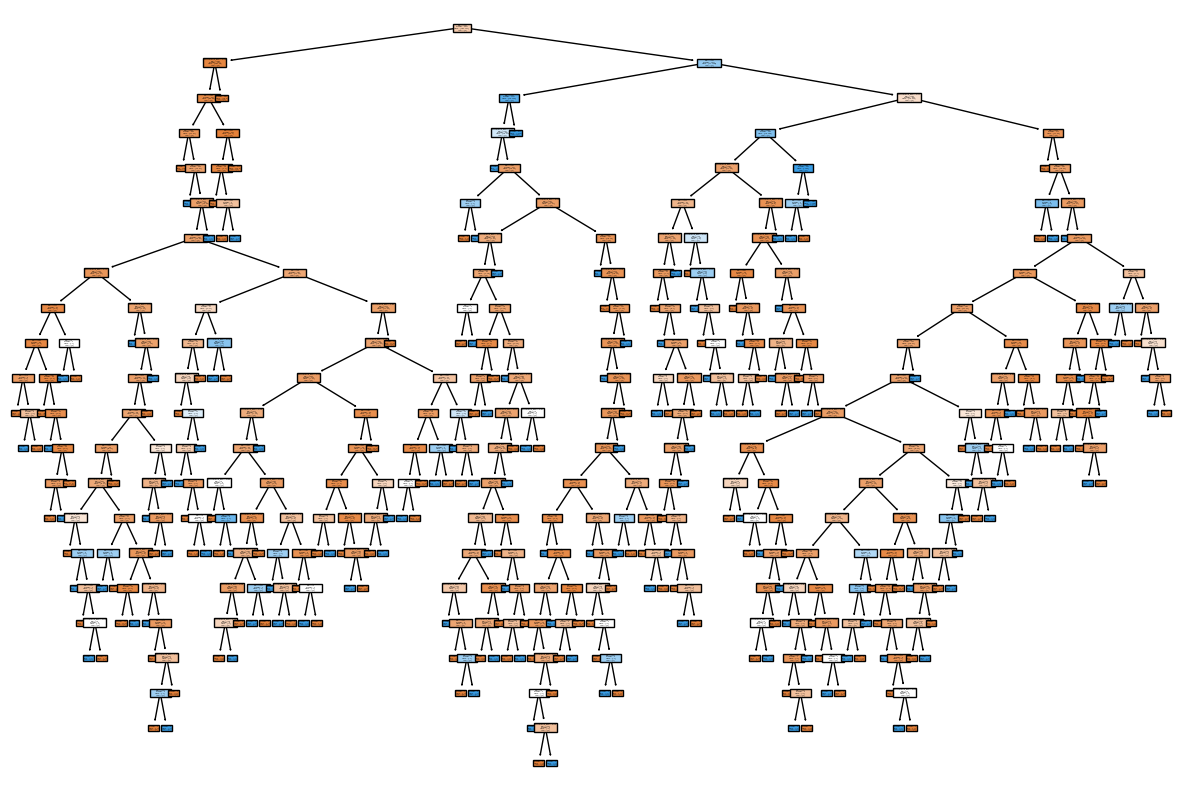

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=selected_features, class_names=True, filled=True)
plt.show()

In [ ]:
# Visualizing the decision tree with the correct class names
dot_data = export_graphviz(                 #generated the graphviz representation
    model,                                  #Using trained model
    out_file=None,                          #specifies that the output shouldnot be written in a file rather in a dot file rep[resentation]
    feature_names=x.columns,                #specifies the features to be used in visualisation labeling
    class_names=selected_features,
    filled=True,                            #filling colours
    rounded=True,                           #rounded corners
    special_characters=True
)

# converting the dot file to an image
graph = pydotplus.graph_from_dot_data(dot_data)  #converting the dot format to image or string
Image(graph.create_png())


**Hyperparameter Tuning**

In [ ]:
#the hyperparameters and their possible values
param_grid = {
    'max_depth': [3, 5, 10, None],               #maximum depth optimized inorder to prevent overfitting
    'min_samples_split': [2, 5, 10],             #minimum samples required in a node to split
    'min_samples_leaf': [1, 2, 4],               #minimum samples required in a leafnode
    'criterion': ['gini', 'entropy']             #to measure the impurities
}

# Initializing GridSearchCV with the model, parameters, and cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)#function checks for the best parameters,cv for cross validation,n_jobs to make the process faster and verbose to provide messages based on updates


# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best model with the best parameters
best_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
train_score = grid_search.score(x_train, y_train)
test_score = grid_search.score(x_test, y_test)
print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")


Training Score: 0.9533044143914264
Testing Score: 0.9489795918367347


**Model with best Parameters**

In [ ]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

**The performance matrix of tuned Model**

In [ ]:
y_pred=best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#the evaluation metrics
print('Accuracy:')
print(accuracy)
print('Precision:')
print(precision)
print('Recall:')
print(recall)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy:
0.9489795918367347
Precision:
0.9935897435897436
Recall:
0.8659217877094972
Confusion Matrix:
[[620   2]
 [ 48 310]]


In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

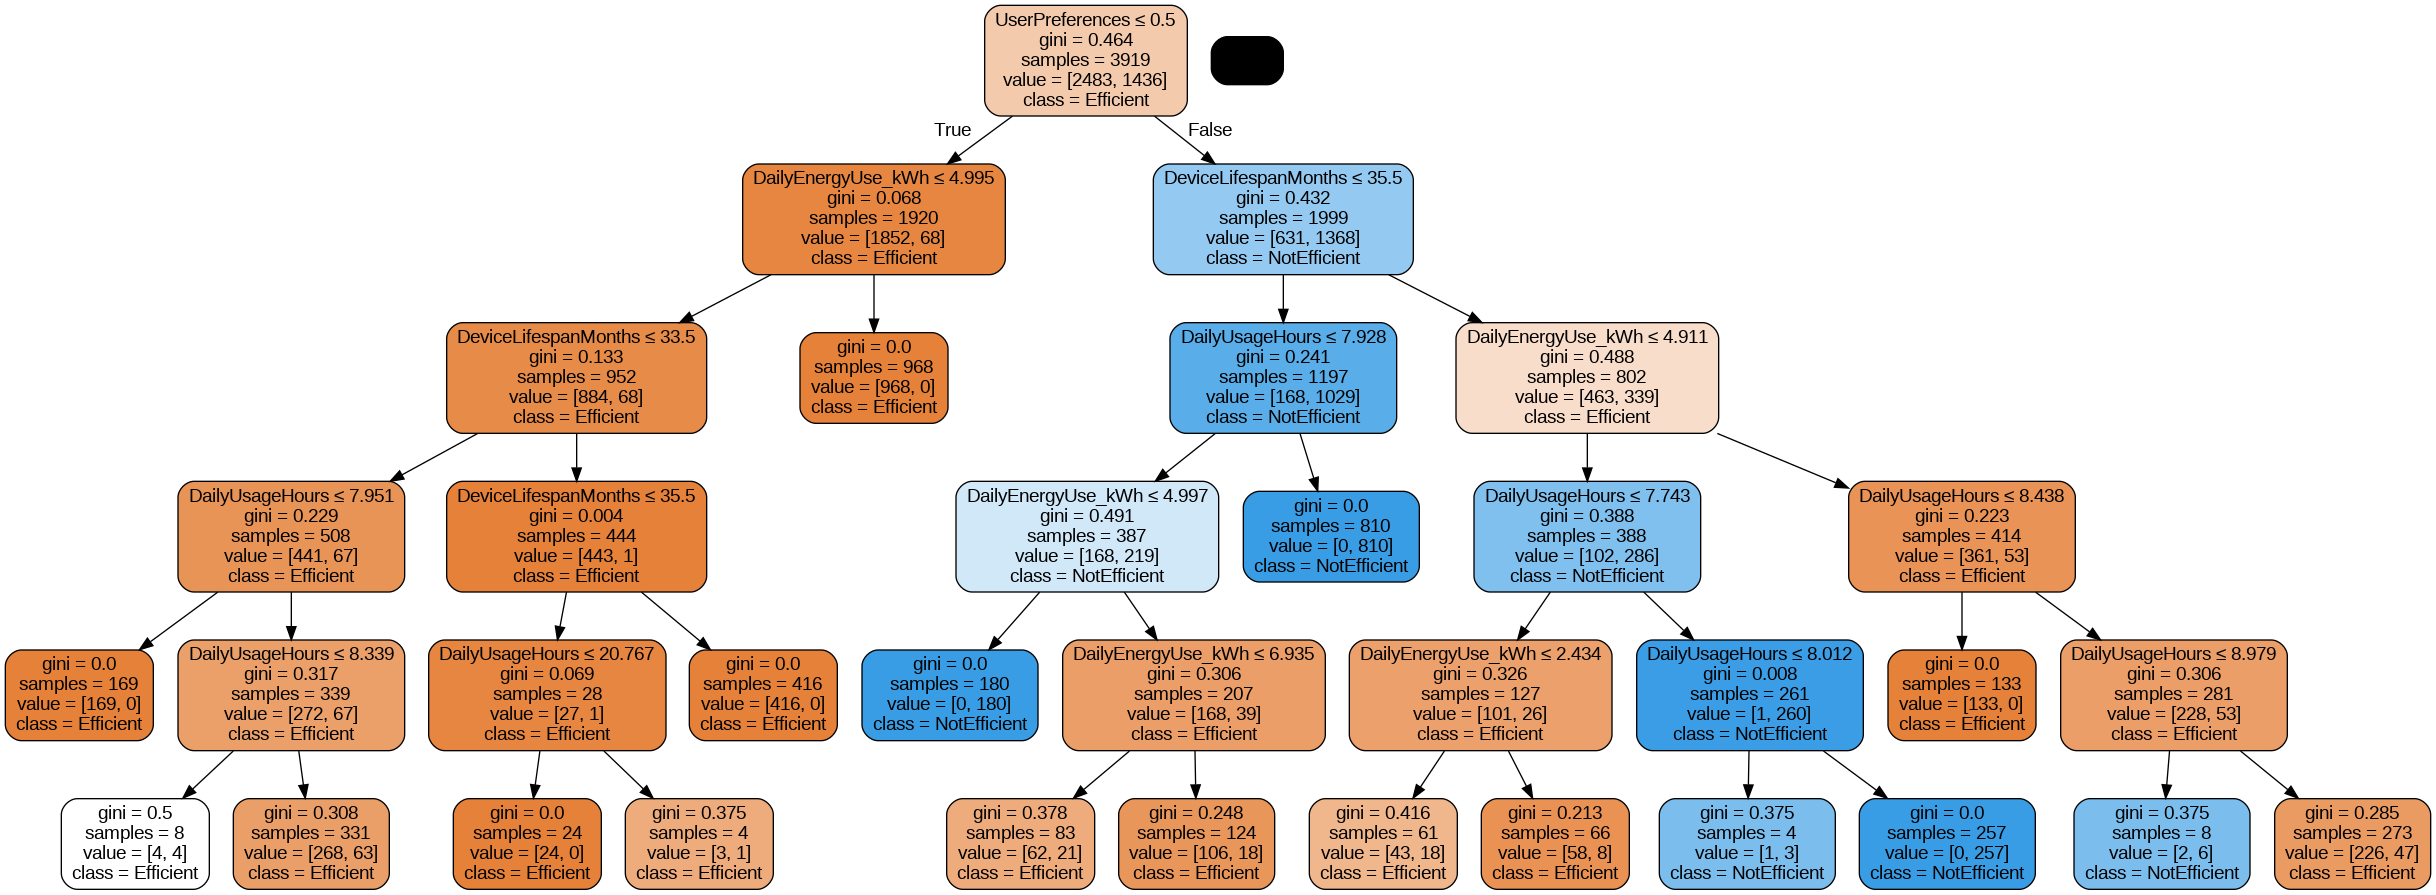

In [ ]:
# Visualizing the decision tree for the best model
dot_data = export_graphviz(
    best_model,
    out_file=None,
    feature_names=x.columns,
    class_names=['Efficient','NotEfficient'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Converting to an image and display
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


# For New Data

In [ ]:
joblib.dump(model, 'decision_tree_model.pkl')


['decision_tree_model.pkl']

In [ ]:
new_data = pd.read_excel('/content/trial_1.xlsx')

In [ ]:
X_new = new_data[['UserPreferences', 'DailyUsageHours', 'DailyEnergyUse_kWh', 'DeviceLifespanMonths']]

predictions = model.predict(X_new)

print(predictions)

[0 0 0 0 0 1 0 0 1 1 1 1]


Testing

In [ ]:
importances = model.feature_importances_

# Find the most important feature
most_important_index = np.argmax(importances)
most_important_feature = selected_features[most_important_index]

print(f"The most important feature is '{most_important_feature}' with an importance score of {importances[most_important_index]}")

The most important feature is 'UserPreferences' with an importance score of 0.45328625495143476


This balance indicates that the model has captured the patterns in the training data without overfitting and generalizes well to unseen data.

In [ ]:
errors = x_test[y_test != y_pred]
print(f"Misclassified instances:\n{errors}")


Misclassified instances:
      UserPreferences  DailyUsageHours  DailyEnergyUse_kWh  \
3599                1         3.563264            5.175960   
2473                0         8.842859            4.192824   
2015                0        13.325117            4.163882   
724                 1        13.013066            9.088117   
1253                0         8.512606            3.603668   
...               ...              ...                 ...   
4401                1         2.093215            6.067025   
2483                1        19.908373            5.929066   
3655                1         3.531004            6.249221   
3776                1         2.979571            5.358868   
4089                1        14.358632            8.104281   

      DeviceLifespanMonths  
3599                    13  
2473                     5  
2015                    33  
724                     45  
1253                     5  
...                    ...  
4401                    30 

These rows represent the data points that the decision tree model struggled to classify correctly.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")


Cross-validation accuracy scores: [0.95153061 0.96045918 0.93622449 0.96045918 0.94380587]
Mean cross-validation accuracy: 0.9504958688456225


**INSIGHTS**

Median Lifespan by Device Category:


Devices with a higher median lifespan are generally those that last longer overall. This suggests that certain categories of devices are designed or built to be more durable, which could be a key factor in their long-term value.

Thermostat Lifespan vs. Preference:

The thermostat has a higher lifespan but is less preferred compared to other devices. This could indicate that while thermostats are built to last longer, they might not be as popular due to factors such as functionality, user experience, or market trends.

Efficiency and Lifespan:

The higher lifespan of inefficient devices suggests that these devices are built to last despite their inefficiency. This might indicate that the design or materials used in these devices contribute to their durability, even though they may not be energy-efficient.

User Preference Ranking:

The ranking of devices based on user preference is as follows: Camera > Lights > Smart Speaker > Security System > Thermostat. This preference ranking could inform product development and marketing strategies, suggesting that features, ease of use, or other factors influencing user satisfaction are more crucial for cameras and lights compared to other devices.

High Energy Consumption Outliers:

There are devices with extremely high usage, indicating a few outliers that consume significantly more energy. This could point to potential inefficiencies or issues with certain devices, or it may reflect specific user behaviors. Addressing these outliers might involve investigating the reasons behind high energy consumption and exploring opportunities for optimizing energy use.